# NOTEBOOK 3: Exploratory data analysis

In [26]:
import pandas as pd

In [27]:
df_red = pd.read_csv('data/winequality-red.csv', delimiter=';')
df_red.head()  # Prints the first 5 rows of the dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Visualization
---
### Boxplots
The module `seaborn` implements a lot of nice statistical plots (see: https://seaborn.pydata.org/examples/index.html)

<Axes: >

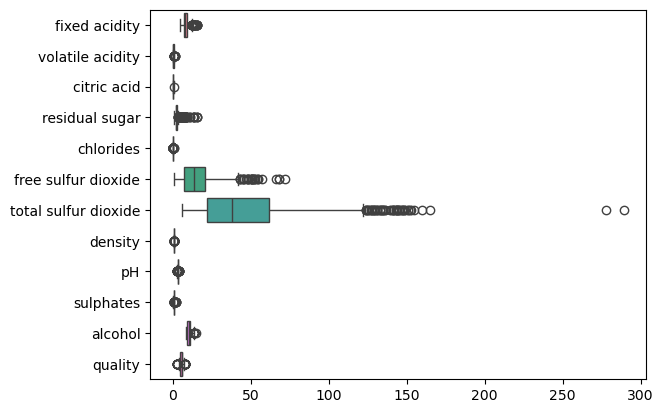

In [28]:
import seaborn as sns

sns.boxplot(data=df_red, orient="h")

(-1.0, 375.0)

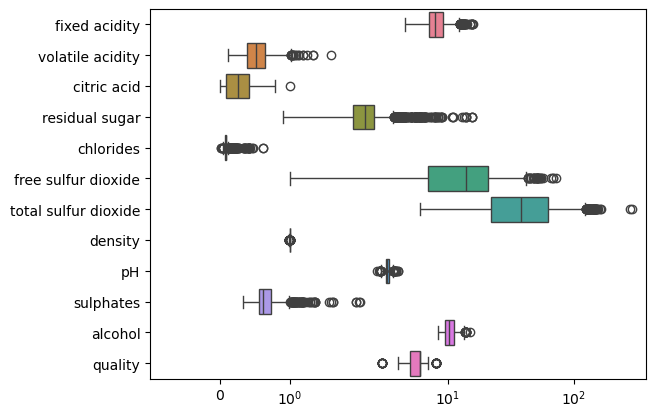

In [29]:
ax = sns.boxplot(data=df_red, orient="h")
ax.set_xscale('symlog')
ax.set_xlim(left=-1, right=375)

Standardization is done the remove any physical units from the data and ensure a mean on zero and a standard deviation of one

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_red)

type(scaled_data)

numpy.ndarray

In [31]:
df_red_scaled = pd.DataFrame(scaled_data, columns=df_red.columns)

<Axes: >

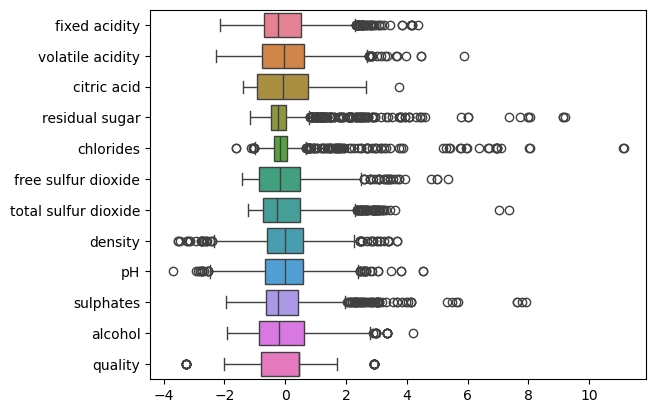

In [32]:
sns.boxplot(data=df_red_scaled, orient="h")

## Correlation analysis
---

### Pearson correlation coefficient
The Pearson correlation coefficient is a measure of linear correlation between two variables `X` and `y`. It quantifies how well the relationship between two variables can be described by a straight line

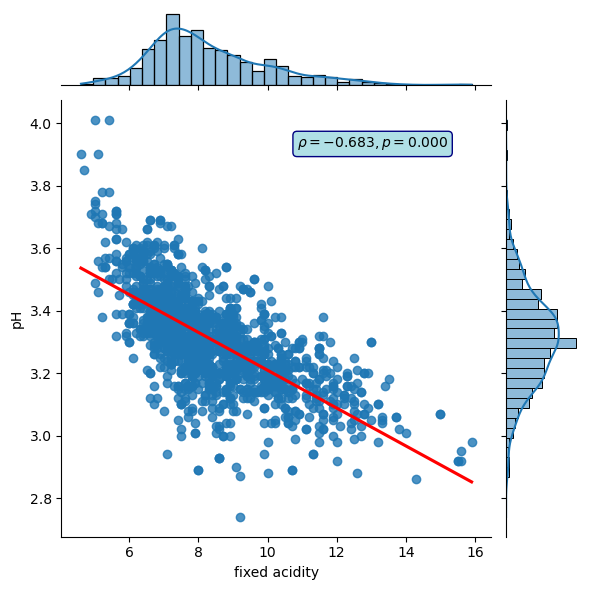

In [43]:
import scipy.stats as stats
import matplotlib.pyplot as plt

joint_plt = sns.jointplot(y='pH', x='fixed acidity', data=df_red, kind='reg', ci=False)
plt.gca().lines[0].set_color('red') # Change the regression line color to red

r, p = stats.pearsonr(df_red['fixed acidity'], df_red['pH'], alternative='less')
plt.gca().annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.9, 0.9), xycoords='axes fraction',
                    ha='right', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}) # gca stands for "Get Current Axes"
plt.show()

The null hypothesis (H0): There is no linear correlation between `X` and `y` (population correlation $\rho=0$)

In [44]:
p, r

(2.0315170199225557e-220, -0.6829781945685313)

#### Heat maps

<Axes: >

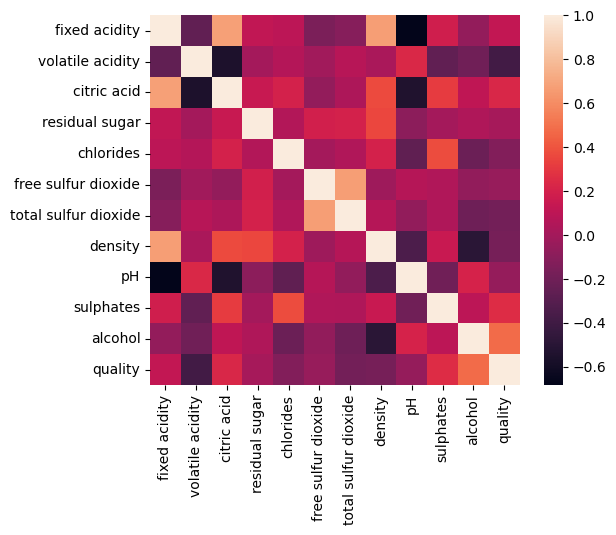

In [34]:
correlation = df_red.corr(method='pearson') # Calculate the Pearson correlation matrix
sns.heatmap(correlation, annot=False,square=True)

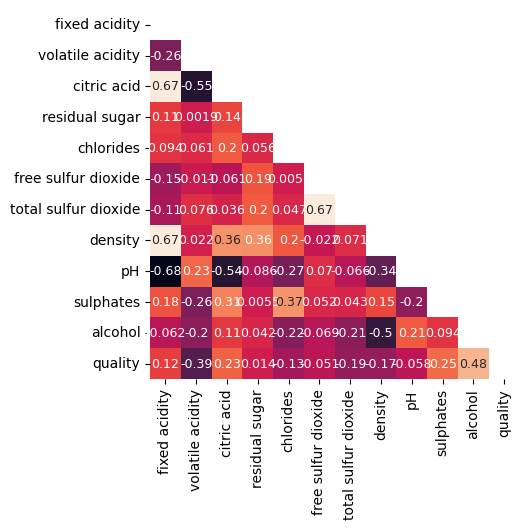

In [42]:
import numpy as np

mask_triu = np.triu(correlation)
sns.heatmap(data=correlation, mask=mask_triu, square=True, annot=True, annot_kws={"size":9})

plt.gca().collections[0].colorbar.remove() # remove the color bar

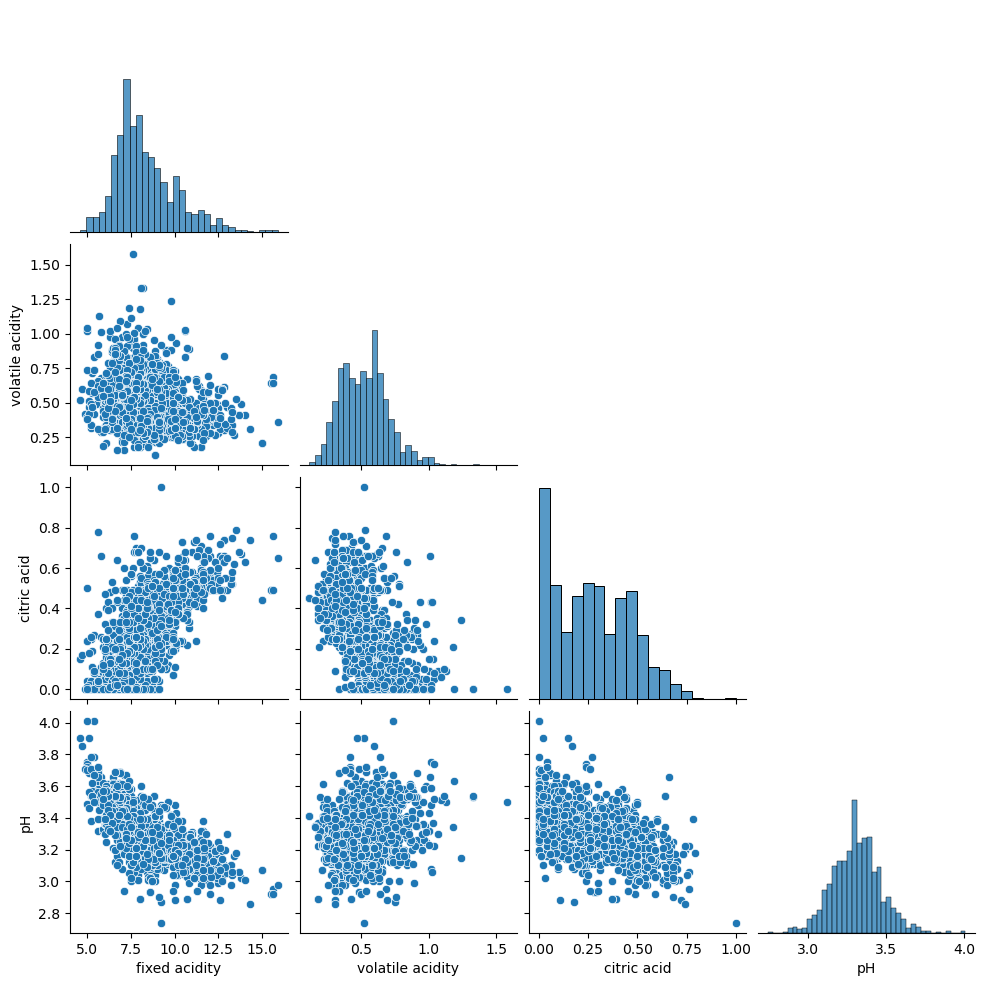

In [36]:
sns.pairplot(df_red[['fixed acidity','volatile acidity','citric acid', 'pH']], corner=True)

## Dimension reduction
---
### PCA
Principal Component Analysis is a dimensionality reduction technique. It transforms a dataset with possibly correlated variables into a set of linearly uncorrelated variables called principal components.

In [37]:
df_red = pd.read_csv('data/winequality-red.csv', delimiter=';')
df_red["hue"] = "red"

df_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
df_white["hue"] = "white"

df_wine = pd.concat([df_red, df_white], ignore_index=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,hue
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  hue                   6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_pca = df_wine.copy().drop(columns=['quality', 'hue'])
scaler = StandardScaler()

data_pca_scaled = scaler.fit_transform(data_pca)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_pca_scaled)

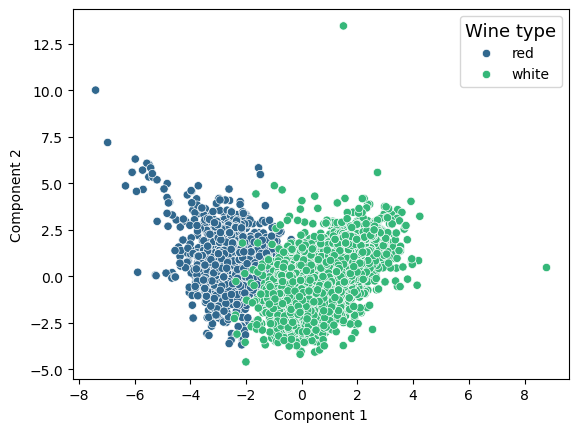

In [45]:
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_wine['hue'], palette='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title="Wine type", title_fontsize='13')
plt.show()

In [41]:
import plotly.express as px

fig = px.scatter_3d(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    z=pca_result[:, 2],
    color=df_wine['hue'],
    labels={'x': 'Component 1', 'y': 'Component 2', 'z': 'Component 3', 'color': 'Wine Type'},
    title='3D PCA of Wine Data',
)

fig.update_traces(marker=dict(size=5))

fig.show()